Rain Binary Classification

Dataset : https://www.kaggle.com/code/naumov1889/rain-in-australia-binary-classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

In [ ]:
data = pd.read_csv('weatherAUS.csv')
df = pd.DataFrame(data)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
MissingIndicator(missing_values=np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = imp.fit_transform(df)
df

array([['12/1/2008', 'Albury', 13.4, ..., 21.8, 'No', 'No'],
       ['12/2/2008', 'Albury', 7.4, ..., 24.3, 'No', 'No'],
       ['12/3/2008', 'Albury', 12.9, ..., 23.2, 'No', 'No'],
       ...,
       ['6/23/2017', 'Uluru', 5.4, ..., 26.1, 'No', 'No'],
       ['6/24/2017', 'Uluru', 7.8, ..., 26.0, 'No', 'No'],
       ['6/25/2017', 'Uluru', 14.9, ..., 20.9, 'No', 'No']], dtype=object)

In [ ]:
cols = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
        'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RainToday','RainTomorrow']

In [ ]:
df_new = pd.DataFrame(df, columns=cols)
df_new.drop('Date', axis=1, inplace=True)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df_new.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
dict1 = {'No' : 0, 'Yes' : 1}
df_new['RainToday'] = df_new.RainToday.map(dict1)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,No
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,No
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,No
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,No
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No


In [ ]:
df_new['RainTomorrow'] = df_new.RainTomorrow.map(dict1)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
df_new = pd.get_dummies(df_new, columns=['Location'])
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,20.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,4.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,19.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,11.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,7.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_new = pd.get_dummies(df_new, columns=['WindGustDir'])

In [ ]:
df_new = pd.get_dummies(df_new, columns=['WindDir9am'])

In [ ]:
df_new = pd.get_dummies(df_new, columns=['WindDir3pm'])

In [ ]:
mns = MinMaxScaler()
col_scale = ['MinTemp', 	'MaxTemp', 	'Rainfall',	'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
             'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df_new[col_scale] = mns.fit_transform(df_new[col_scale])
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.516509,0.523629,0.001617,0.027586,0.0,0.294574,20.0,0.275862,0.71,0.22,...,False,False,False,False,False,False,False,False,True,False
1,0.375000,0.565217,0.000000,0.027586,0.0,0.294574,4.0,0.252874,0.44,0.25,...,False,False,False,False,False,False,False,False,False,True
2,0.504717,0.576560,0.000000,0.027586,0.0,0.310078,19.0,0.298851,0.38,0.30,...,False,False,False,False,False,False,False,False,False,True
3,0.417453,0.620038,0.000000,0.027586,0.0,0.139535,11.0,0.103448,0.45,0.16,...,False,False,False,False,False,False,False,False,False,False
4,0.613208,0.701323,0.002695,0.027586,0.0,0.271318,7.0,0.229885,0.82,0.33,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
x = df_new.drop(['RainTomorrow'], axis=1)
y = df_new['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, random_state=42, test_size=0.2)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64, input_dim = x_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           7,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=500)

Epoch 1/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7705 - loss: 0.5171 - val_accuracy: 0.8296 - val_loss: 0.3863
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8382 - loss: 0.3763 - val_accuracy: 0.8440 - val_loss: 0.3617
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8421 - loss: 0.3649 - val_accuracy: 0.8407 - val_loss: 0.3616
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3566 - val_accuracy: 0.8453 - val_loss: 0.3569
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8490 - loss: 0.3514 - val_accuracy: 0.8435 - val_loss: 0.3578
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8517 - loss: 0.3467 - val_accuracy: 0.8468 - val_loss: 0.3500
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8538 - loss: 0.3427 - val_accuracy: 0.8497 - val_loss: 0.3492
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.3383 - val_accuracy: 0.

In [ ]:
model.evaluate(x_test, y_test)

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8413 - loss: 0.3980


[0.39724797010421753, 0.8429465293884277]

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred>=0.5).astype(int)

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


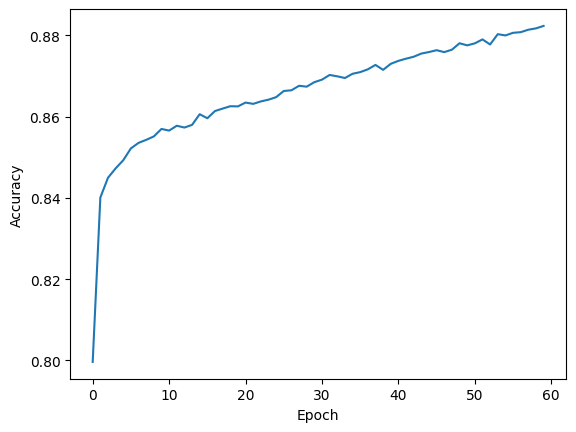

In [ ]:
plt.plot(hist.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

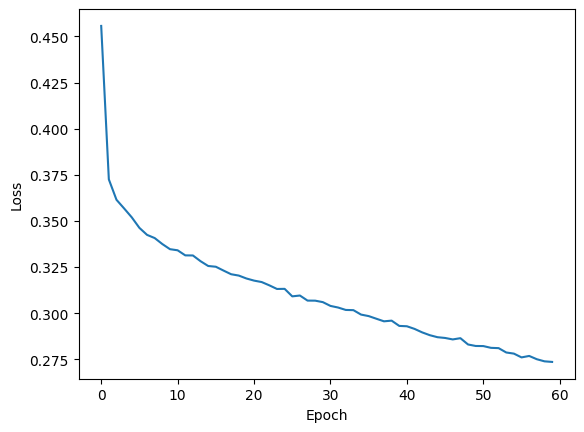

In [ ]:
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Axes: >

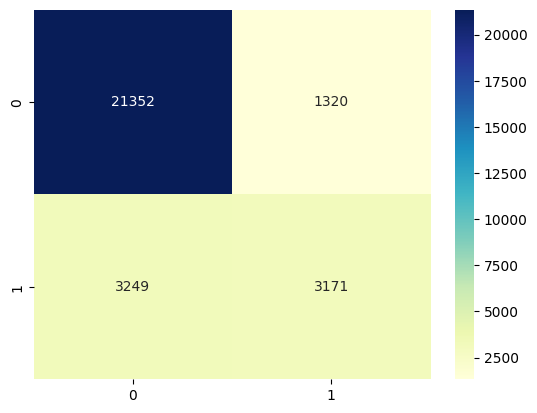

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='YlGnBu', fmt='g')